# Simple Comparison of Realized Volatility and Returns

This notebook provides a focused comparison between realized volatility (rv5_sqrt) and returns (rtn) for two major cryptocurrencies: Bitcoin (BTC) and Ethereum (ETH).

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set plotting style
plt.style.use('ggplot')
sns.set(style="darkgrid")
%matplotlib inline

In [3]:
# Load the realized volatility data
import os

# Get the absolute path to the data directory
notebook_dir = os.path.dirname(os.path.abspath('__file__'))
project_root = os.path.abspath(os.path.join(notebook_dir, '../..'))
rv5_sqrt_file = os.path.join(project_root, 'data/rv5_sqrt_38_crypto.csv')

In [4]:
# project_root, notebook_dir, rv5_sqrt_file

In [5]:

print(f"Loading realized volatility data from {rv5_sqrt_file}...")
rv5_sqrt = pd.read_csv(rv5_sqrt_file, index_col=0, parse_dates=True)
print(f"Realized volatility data shape: {rv5_sqrt.shape}")
print(f"Time range: {rv5_sqrt.index.min()} to {rv5_sqrt.index.max()}")

# Select just BTC and ETH
selected_cryptos = ['BTCUSDT', 'ETHUSDT']
selected_cryptos = [crypto for crypto in selected_cryptos if crypto in rv5_sqrt.columns]
rv5_sqrt = rv5_sqrt[selected_cryptos]

rv5_sqrt.head()

Loading realized volatility data from /Users/DSK/Documents/GitHub/GSPHAR/data/rv5_sqrt_38_crypto.csv...
Realized volatility data shape: (1609, 38)
Time range: 2020-08-22 00:00:00+00:00 to 2025-01-16 00:00:00+00:00


,BTCUSDT,ETHUSDT
Open Time,,
2020-08-22 00:00:00+00:00,0.011886,0.023769
2020-08-23 00:00:00+00:00,0.013746,0.028576
2020-08-24 00:00:00+00:00,0.012763,0.031429
2020-08-25 00:00:00+00:00,0.024773,0.047357
2020-08-26 00:00:00+00:00,0.020466,0.034105


In [6]:
# Load the 5-minute cryptocurrency data to calculate daily returns
crypto_file = os.path.join(project_root, 'data/df_cl_5m.parquet')
print(f"Loading 5-minute data from {crypto_file}...")
crypto_data = pd.read_parquet(crypto_file, engine='pyarrow')
print(f"5-minute data shape: {crypto_data.shape}")
print(f"Time range: {crypto_data.index.min()} to {crypto_data.index.max()}")

# Select just BTC and ETH
crypto_data = crypto_data[selected_cryptos]

crypto_data.head()

Loading 5-minute data from /Users/DSK/Documents/GitHub/GSPHAR/data/df_cl_5m.parquet...
5-minute data shape: (530678, 38)
Time range: 2020-01-01 00:00:00+00:00 to 2025-01-16 15:05:00+00:00


symbol,BTCUSDT,ETHUSDT
Open Time,,
2020-01-01 00:00:00+00:00,7175.25,128.81
2020-01-01 00:05:00+00:00,7186.69,128.87
2020-01-01 00:10:00+00:00,7176.26,128.87
2020-01-01 00:15:00+00:00,7173.68,128.82
2020-01-01 00:20:00+00:00,7171.81,128.67


In [7]:
# Calculate daily returns
print("Calculating daily returns...")
daily_prices = crypto_data.resample('D').last()
daily_returns = daily_prices.pct_change().dropna()
print(f"Daily returns shape: {daily_returns.shape}")
print(f"Time range: {daily_returns.index.min()} to {daily_returns.index.max()}")
daily_returns.head()

Calculating daily returns...
Daily returns shape: (1842, 2)
Time range: 2020-01-02 00:00:00+00:00 to 2025-01-16 00:00:00+00:00


symbol,BTCUSDT,ETHUSDT
Open Time,,
2020-01-02 00:00:00+00:00,-0.032724,-0.026872
2020-01-03 00:00:00+00:00,0.054536,0.056487
2020-01-04 00:00:00+00:00,0.001225,-0.001117
2020-01-05 00:00:00+00:00,0.000497,0.008871
2020-01-06 00:00:00+00:00,0.054802,0.064361


In [8]:
# Ensure both datasets have the same date range
common_dates = rv5_sqrt.index.intersection(daily_returns.index)
rv5_sqrt_aligned = rv5_sqrt.loc[common_dates]
daily_returns_aligned = daily_returns.loc[common_dates]

print(f"Common date range: {common_dates.min()} to {common_dates.max()}")
print(f"Number of common dates: {len(common_dates)}")

Common date range: 2020-08-22 00:00:00+00:00 to 2025-01-16 00:00:00+00:00
Number of common dates: 1609


## 1. Time Series Visualization

Let's visualize the realized volatility and returns over time for both cryptocurrencies.

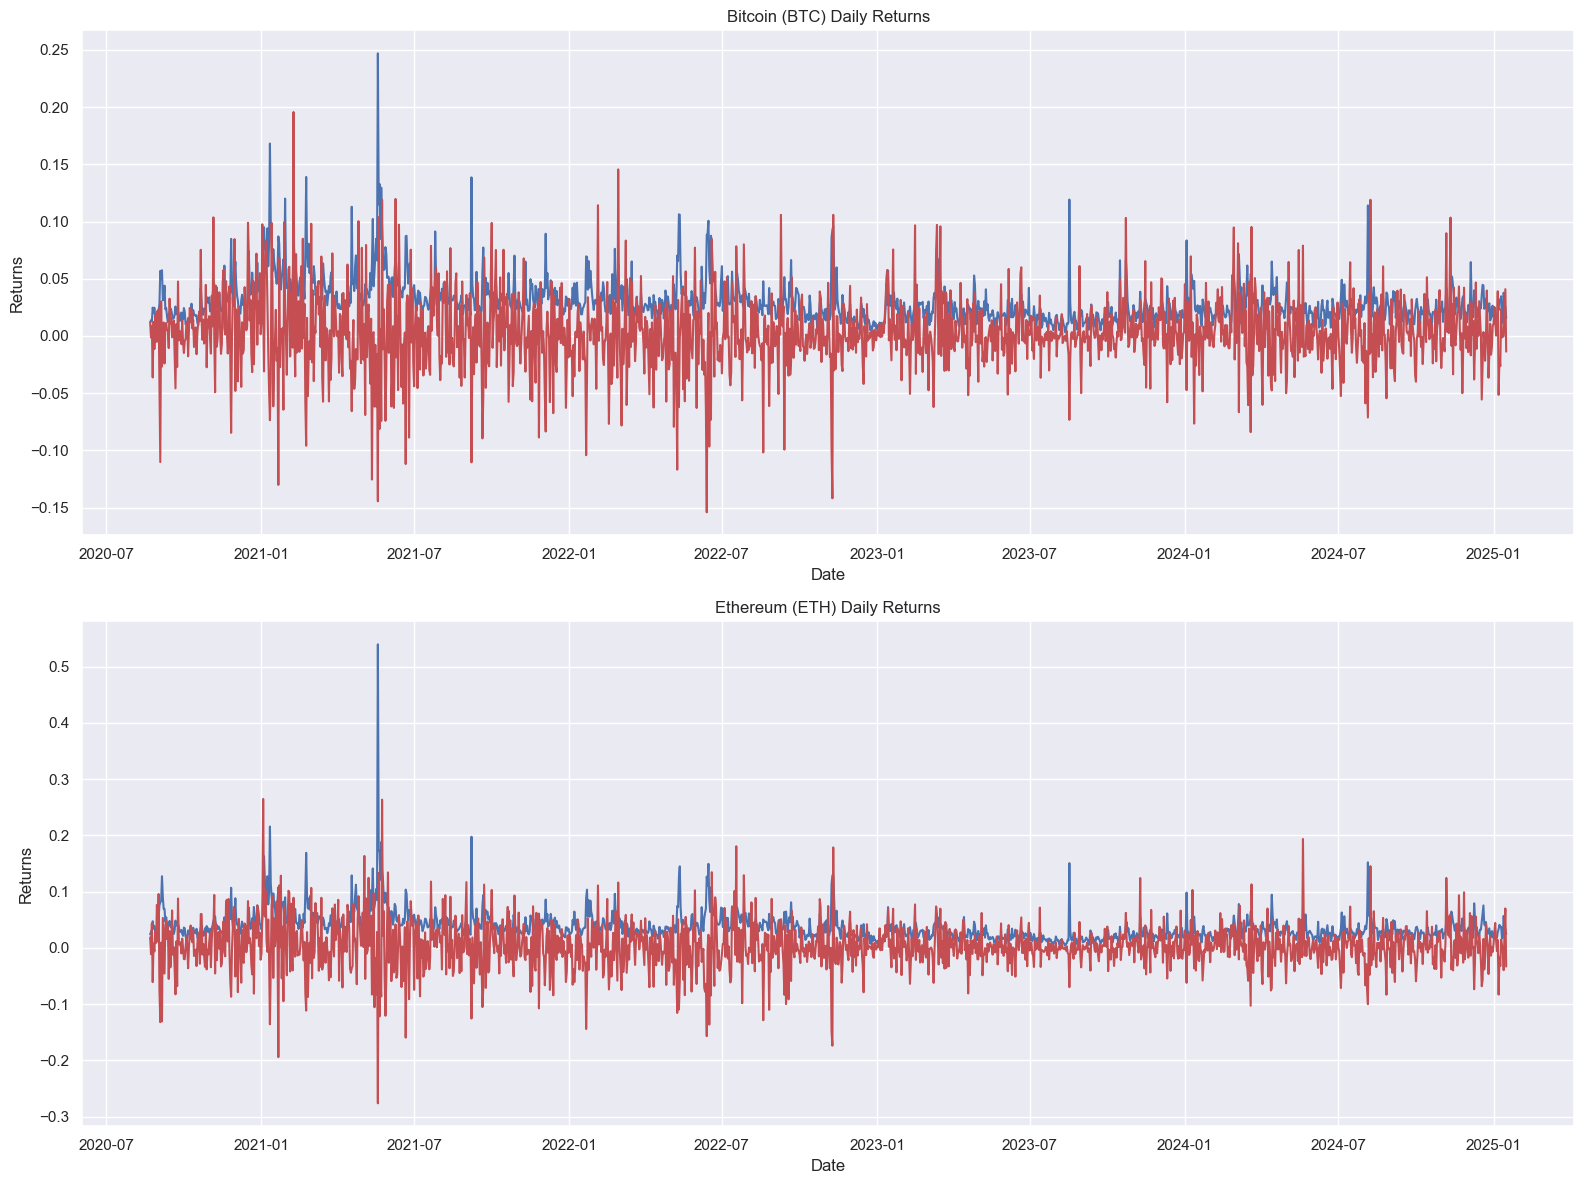

In [9]:
# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Plot realized volatility for BTC
axes[0].plot(rv5_sqrt_aligned.index, rv5_sqrt_aligned['BTCUSDT'], 'b-')
axes[0].set_title('Bitcoin (BTC) Realized Volatility')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Realized Volatility')
axes[0].grid(True)

# Plot returns for BTC
axes[0].plot(daily_returns_aligned.index, daily_returns_aligned['BTCUSDT'], 'r-')
axes[0].set_title('Bitcoin (BTC) Daily Returns')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Returns')
axes[0].grid(True)

# Plot realized volatility for ETH
axes[1].plot(rv5_sqrt_aligned.index, rv5_sqrt_aligned['ETHUSDT'], 'b-')
axes[1].set_title('Ethereum (ETH) Realized Volatility')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Realized Volatility')
axes[1].grid(True)

# Plot returns for ETH
axes[1].plot(daily_returns_aligned.index, daily_returns_aligned['ETHUSDT'], 'r-')
axes[1].set_title('Ethereum (ETH) Daily Returns')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Returns')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## 2. Relationship Between Realized Volatility and Absolute Returns

Realized volatility should be related to the magnitude of returns (absolute returns) rather than the direction.

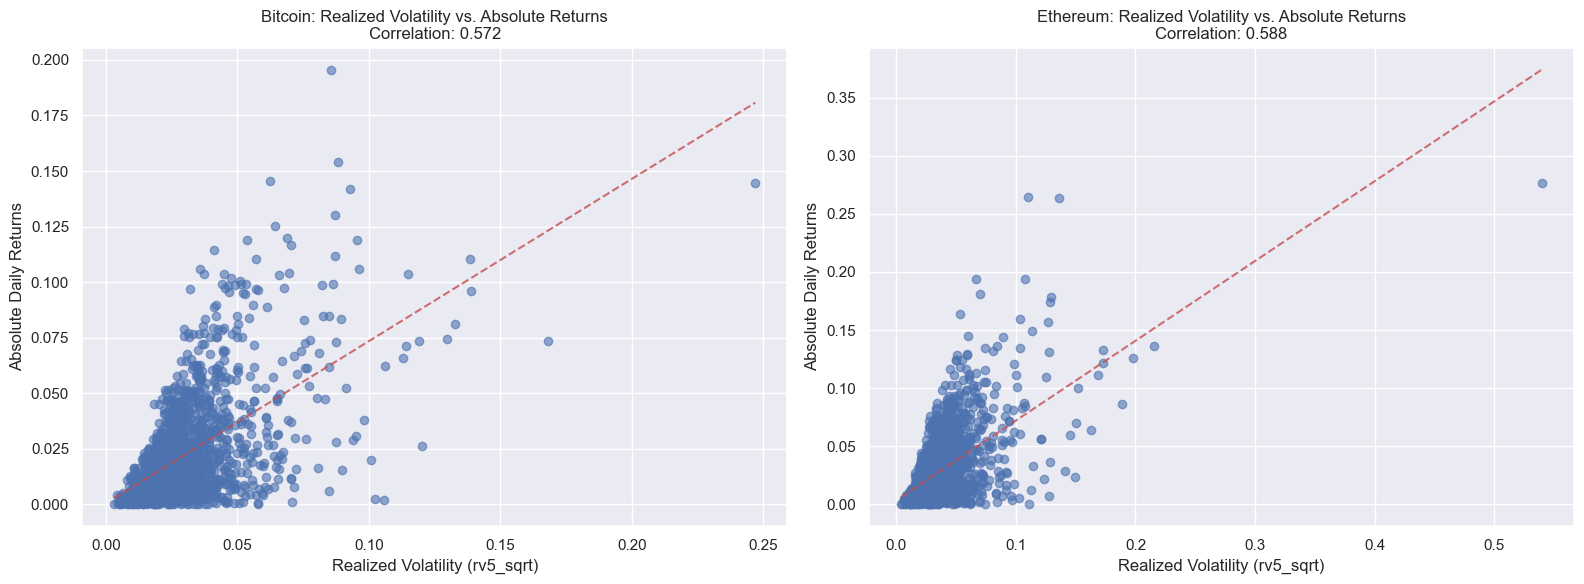

In [10]:
# Calculate absolute returns
abs_returns = daily_returns_aligned.abs()

# Create scatter plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# BTC scatter plot
axes[0].scatter(rv5_sqrt_aligned['BTCUSDT'], abs_returns['BTCUSDT'], alpha=0.6)
corr_btc = np.corrcoef(rv5_sqrt_aligned['BTCUSDT'], abs_returns['BTCUSDT'])[0, 1]
axes[0].set_title(f'Bitcoin: Realized Volatility vs. Absolute Returns\nCorrelation: {corr_btc:.3f}')
axes[0].set_xlabel('Realized Volatility (rv5_sqrt)')
axes[0].set_ylabel('Absolute Daily Returns')
# Add regression line
z = np.polyfit(rv5_sqrt_aligned['BTCUSDT'], abs_returns['BTCUSDT'], 1)
p = np.poly1d(z)
axes[0].plot(np.sort(rv5_sqrt_aligned['BTCUSDT']), p(np.sort(rv5_sqrt_aligned['BTCUSDT'])), "r--", alpha=0.8)
axes[0].grid(True)

# ETH scatter plot
axes[1].scatter(rv5_sqrt_aligned['ETHUSDT'], abs_returns['ETHUSDT'], alpha=0.6)
corr_eth = np.corrcoef(rv5_sqrt_aligned['ETHUSDT'], abs_returns['ETHUSDT'])[0, 1]
axes[1].set_title(f'Ethereum: Realized Volatility vs. Absolute Returns\nCorrelation: {corr_eth:.3f}')
axes[1].set_xlabel('Realized Volatility (rv5_sqrt)')
axes[1].set_ylabel('Absolute Daily Returns')
# Add regression line
z = np.polyfit(rv5_sqrt_aligned['ETHUSDT'], abs_returns['ETHUSDT'], 1)
p = np.poly1d(z)
axes[1].plot(np.sort(rv5_sqrt_aligned['ETHUSDT']), p(np.sort(rv5_sqrt_aligned['ETHUSDT'])), "r--", alpha=0.8)
axes[1].grid(True)

plt.tight_layout()
plt.show()

## 3. Overlapping Returns and Realized Volatility

Let's create plots that show both returns and realized volatility on the same graph to better visualize their relationship over time. We'll first create an interactive version using Plotly, then show the static matplotlib version.

In [11]:
# Import plotly for interactive plots
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create an interactive plot with Plotly
fig = make_subplots(rows=2, cols=1, 
                    subplot_titles=("Bitcoin (BTC): Returns and Realized Volatility", 
                                   "Ethereum (ETH): Returns and Realized Volatility"),
                    vertical_spacing=0.1,
                    specs=[[{"secondary_y": True}], 
                           [{"secondary_y": True}]])

# Add traces for BTC
# Realized volatility on primary y-axis
fig.add_trace(
    go.Scatter(x=rv5_sqrt_aligned.index, y=rv5_sqrt_aligned['BTCUSDT'],
               name="BTC Realized Volatility", line=dict(color='blue')),
    row=1, col=1
)

# Returns on secondary y-axis
fig.add_trace(
    go.Scatter(x=daily_returns_aligned.index, y=daily_returns_aligned['BTCUSDT'],
               name="BTC Returns", line=dict(color='red')),
    row=1, col=1, secondary_y=True
)

# Add traces for ETH
# Realized volatility on primary y-axis
fig.add_trace(
    go.Scatter(x=rv5_sqrt_aligned.index, y=rv5_sqrt_aligned['ETHUSDT'],
               name="ETH Realized Volatility", line=dict(color='blue')),
    row=2, col=1
)

# Returns on secondary y-axis
fig.add_trace(
    go.Scatter(x=daily_returns_aligned.index, y=daily_returns_aligned['ETHUSDT'],
               name="ETH Returns", line=dict(color='red')),
    row=2, col=1, secondary_y=True
)

# Update x and y axis labels
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Date", row=2, col=1)

fig.update_yaxes(title_text="Realized Volatility", row=1, col=1)
fig.update_yaxes(title_text="Returns", secondary_y=True, row=1, col=1)

fig.update_yaxes(title_text="Realized Volatility", row=2, col=1)
fig.update_yaxes(title_text="Returns", secondary_y=True, row=2, col=1)

# Update layout
fig.update_layout(
    height=800,
    width=1000,
    title_text="Interactive Comparison of Returns and Realized Volatility",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Show the figure
fig.show()

### Static Matplotlib Version

Below is the static matplotlib version of the same visualization:

In [17]:
pd.options.plotting.backend = "plotly"

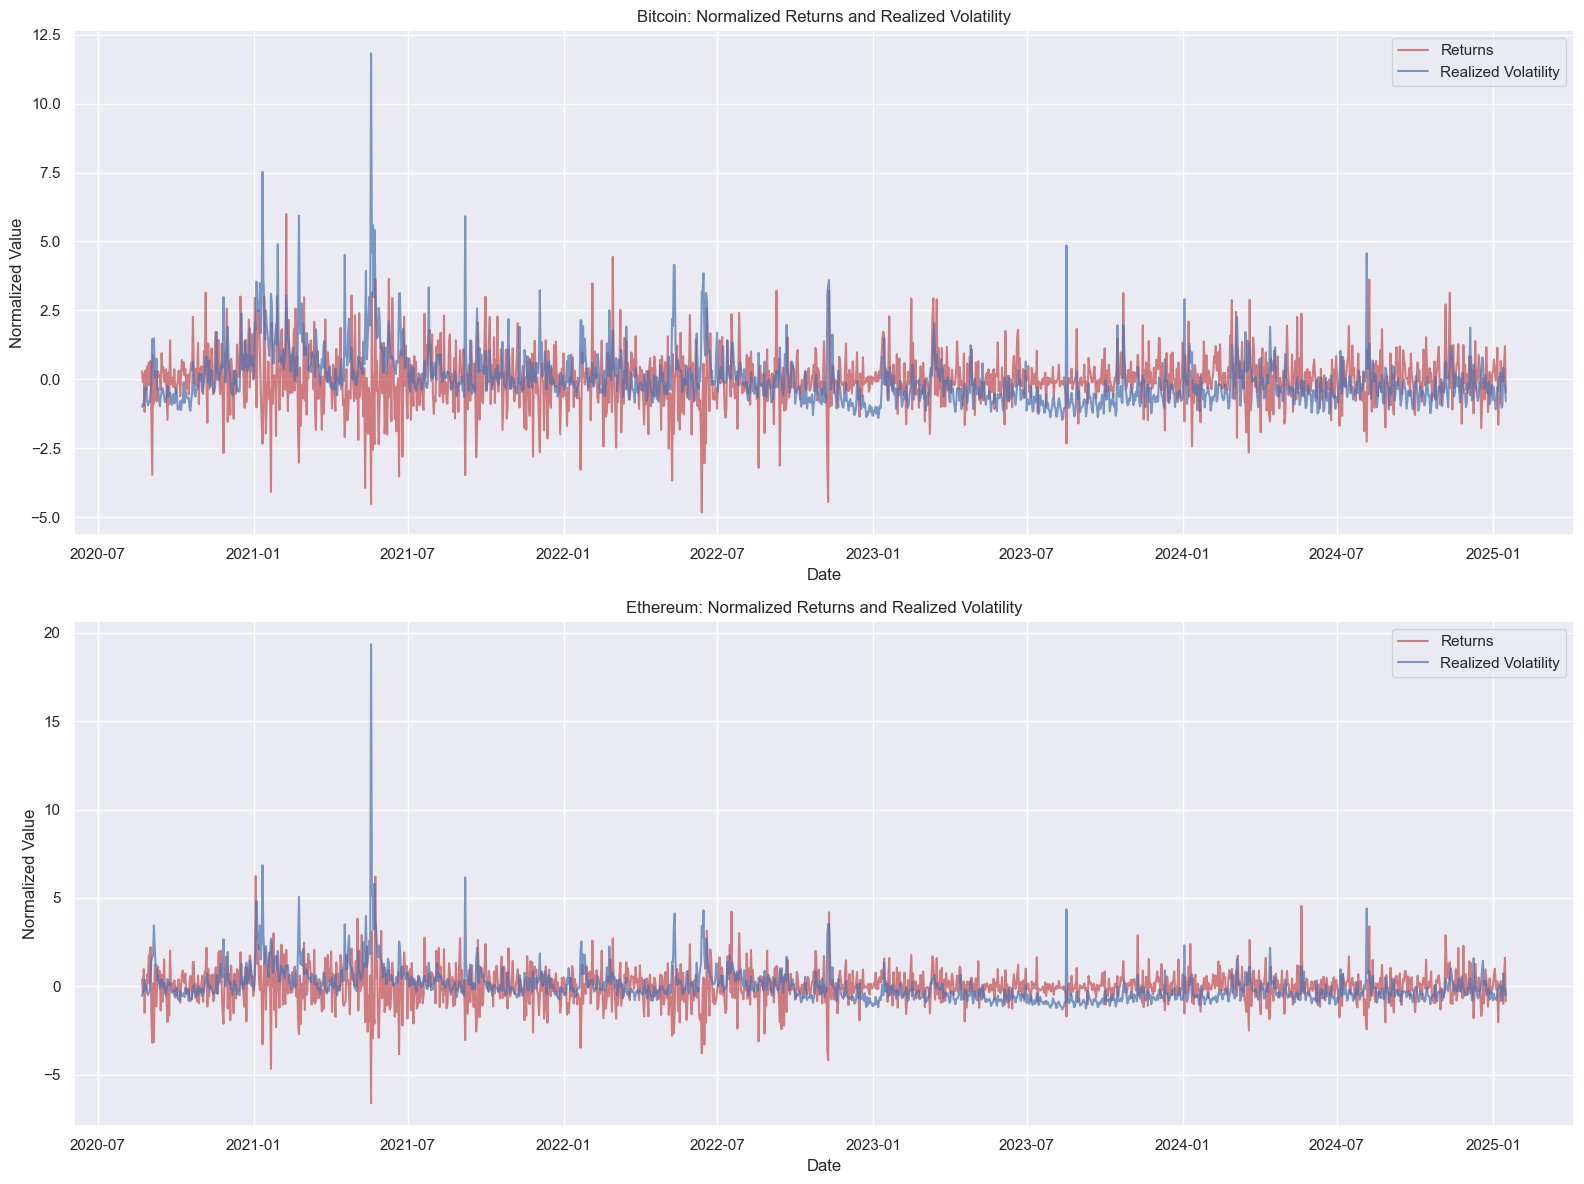

In [18]:
# Create overlapping plots for BTC and ETH
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Normalize the data to make them comparable on the same scale
# For BTC
btc_returns_norm = (daily_returns_aligned['BTCUSDT'] - daily_returns_aligned['BTCUSDT'].mean()) / daily_returns_aligned['BTCUSDT'].std()
btc_rv_norm = (rv5_sqrt_aligned['BTCUSDT'] - rv5_sqrt_aligned['BTCUSDT'].mean()) / rv5_sqrt_aligned['BTCUSDT'].std()

# For ETH
eth_returns_norm = (daily_returns_aligned['ETHUSDT'] - daily_returns_aligned['ETHUSDT'].mean()) / daily_returns_aligned['ETHUSDT'].std()
eth_rv_norm = (rv5_sqrt_aligned['ETHUSDT'] - rv5_sqrt_aligned['ETHUSDT'].mean()) / rv5_sqrt_aligned['ETHUSDT'].std()

# Plot for BTC
axes[0].plot(daily_returns_aligned.index, btc_returns_norm, 'r-', alpha=0.7, label='Returns')
axes[0].plot(rv5_sqrt_aligned.index, btc_rv_norm, 'b-', alpha=0.7, label='Realized Volatility')
axes[0].set_title('Bitcoin: Normalized Returns and Realized Volatility')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Normalized Value')
axes[0].legend()
axes[0].grid(True)

# Plot for ETH
axes[1].plot(daily_returns_aligned.index, eth_returns_norm, 'r-', alpha=0.7, label='Returns')
axes[1].plot(rv5_sqrt_aligned.index, eth_rv_norm, 'b-', alpha=0.7, label='Realized Volatility')
axes[1].set_title('Ethereum: Normalized Returns and Realized Volatility')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Normalized Value')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [13]:
# Calculate absolute returns
abs_returns = daily_returns_aligned.abs()

# Create an interactive plot with Plotly for absolute returns
fig = make_subplots(rows=2, cols=1, 
                    subplot_titles=("Bitcoin (BTC): Absolute Returns and Realized Volatility", 
                                   "Ethereum (ETH): Absolute Returns and Realized Volatility"),
                    vertical_spacing=0.1,
                    specs=[[{"secondary_y": True}], 
                           [{"secondary_y": True}]])

# Add traces for BTC
# Realized volatility on primary y-axis
fig.add_trace(
    go.Scatter(x=rv5_sqrt_aligned.index, y=rv5_sqrt_aligned['BTCUSDT'],
               name="BTC Realized Volatility", line=dict(color='blue')),
    row=1, col=1
)

# Absolute returns on secondary y-axis
fig.add_trace(
    go.Scatter(x=abs_returns.index, y=abs_returns['BTCUSDT'],
               name="BTC Absolute Returns", line=dict(color='red')),
    row=1, col=1, secondary_y=True
)

# Add traces for ETH
# Realized volatility on primary y-axis
fig.add_trace(
    go.Scatter(x=rv5_sqrt_aligned.index, y=rv5_sqrt_aligned['ETHUSDT'],
               name="ETH Realized Volatility", line=dict(color='blue')),
    row=2, col=1
)

# Absolute returns on secondary y-axis
fig.add_trace(
    go.Scatter(x=abs_returns.index, y=abs_returns['ETHUSDT'],
               name="ETH Absolute Returns", line=dict(color='red')),
    row=2, col=1, secondary_y=True
)

# Update x and y axis labels
fig.update_xaxes(title_text="Date", row=1, col=1)
fig.update_xaxes(title_text="Date", row=2, col=1)

fig.update_yaxes(title_text="Realized Volatility", row=1, col=1)
fig.update_yaxes(title_text="Absolute Returns", secondary_y=True, row=1, col=1)

fig.update_yaxes(title_text="Realized Volatility", row=2, col=1)
fig.update_yaxes(title_text="Absolute Returns", secondary_y=True, row=2, col=1)

# Update layout
fig.update_layout(
    height=800,
    width=1000,
    title_text="Interactive Comparison of Absolute Returns and Realized Volatility",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    )
)

# Show the figure
fig.show()

### Static Matplotlib Version with Normalized Values

Below is the static matplotlib version using normalized values:

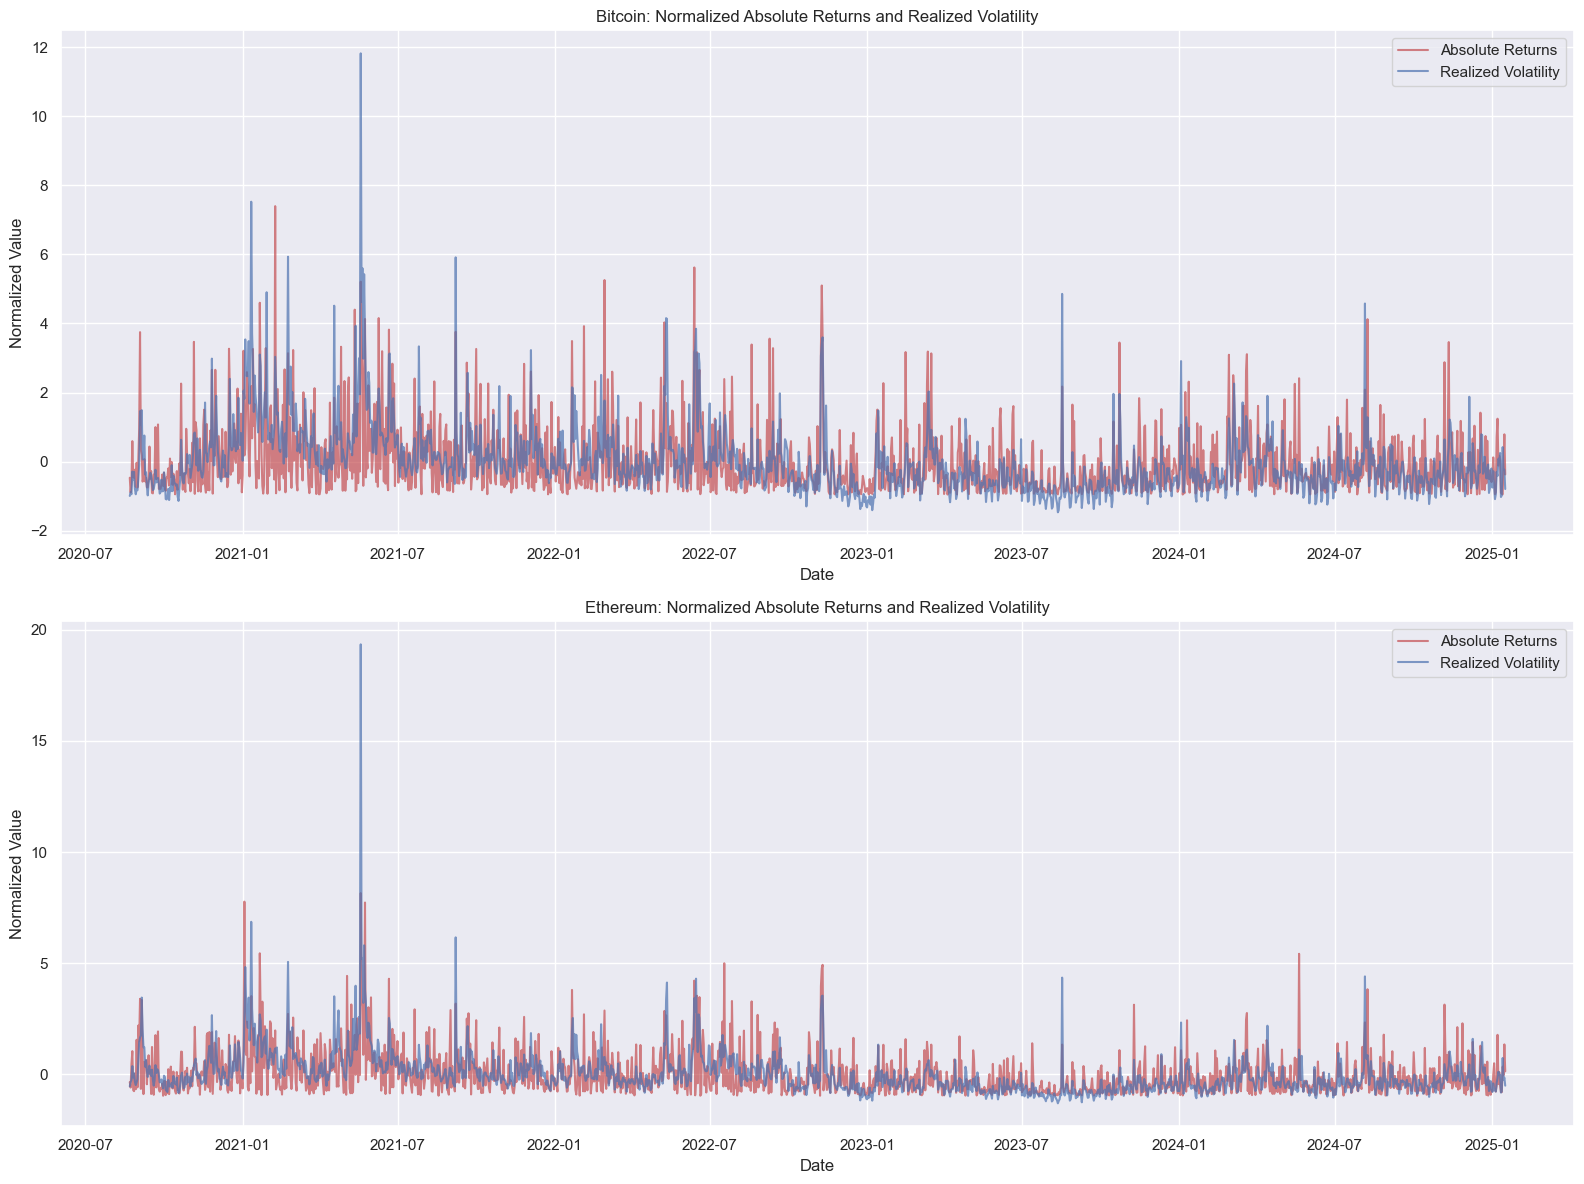

In [14]:
# Create overlapping plots with absolute returns
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Normalize the data to make them comparable on the same scale
# For BTC
btc_abs_returns_norm = (abs_returns['BTCUSDT'] - abs_returns['BTCUSDT'].mean()) / abs_returns['BTCUSDT'].std()
btc_rv_norm = (rv5_sqrt_aligned['BTCUSDT'] - rv5_sqrt_aligned['BTCUSDT'].mean()) / rv5_sqrt_aligned['BTCUSDT'].std()

# For ETH
eth_abs_returns_norm = (abs_returns['ETHUSDT'] - abs_returns['ETHUSDT'].mean()) / abs_returns['ETHUSDT'].std()
eth_rv_norm = (rv5_sqrt_aligned['ETHUSDT'] - rv5_sqrt_aligned['ETHUSDT'].mean()) / rv5_sqrt_aligned['ETHUSDT'].std()

# Plot for BTC
axes[0].plot(abs_returns.index, btc_abs_returns_norm, 'r-', alpha=0.7, label='Absolute Returns')
axes[0].plot(rv5_sqrt_aligned.index, btc_rv_norm, 'b-', alpha=0.7, label='Realized Volatility')
axes[0].set_title('Bitcoin: Normalized Absolute Returns and Realized Volatility')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Normalized Value')
axes[0].legend()
axes[0].grid(True)

# Plot for ETH
axes[1].plot(abs_returns.index, eth_abs_returns_norm, 'r-', alpha=0.7, label='Absolute Returns')
axes[1].plot(rv5_sqrt_aligned.index, eth_rv_norm, 'b-', alpha=0.7, label='Realized Volatility')
axes[1].set_title('Ethereum: Normalized Absolute Returns and Realized Volatility')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Normalized Value')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

## 4. Interactive Scatter Plot Analysis

Let's create interactive scatter plots to visualize the relationship between realized volatility and returns/absolute returns.

In [15]:
# Create interactive scatter plots
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=("Bitcoin: Realized Volatility vs. Returns", 
                                   "Ethereum: Realized Volatility vs. Returns"))

# BTC scatter plot
fig.add_trace(
    go.Scatter(x=rv5_sqrt_aligned['BTCUSDT'], y=daily_returns_aligned['BTCUSDT'],
               mode='markers', name="BTC", marker=dict(color='blue', opacity=0.6)),
    row=1, col=1
)

# ETH scatter plot
fig.add_trace(
    go.Scatter(x=rv5_sqrt_aligned['ETHUSDT'], y=daily_returns_aligned['ETHUSDT'],
               mode='markers', name="ETH", marker=dict(color='red', opacity=0.6)),
    row=1, col=2
)

# Update x and y axis labels
fig.update_xaxes(title_text="Realized Volatility", row=1, col=1)
fig.update_xaxes(title_text="Realized Volatility", row=1, col=2)

fig.update_yaxes(title_text="Returns", row=1, col=1)
fig.update_yaxes(title_text="Returns", row=1, col=2)

# Update layout
fig.update_layout(
    height=500,
    width=1000,
    title_text="Interactive Scatter Plot: Realized Volatility vs. Returns",
    showlegend=True
)

# Show the figure
fig.show()

In [16]:
# Create interactive scatter plots for absolute returns
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=("Bitcoin: Realized Volatility vs. Absolute Returns", 
                                   "Ethereum: Realized Volatility vs. Absolute Returns"))

# BTC scatter plot
fig.add_trace(
    go.Scatter(x=rv5_sqrt_aligned['BTCUSDT'], y=abs_returns['BTCUSDT'],
               mode='markers', name="BTC", marker=dict(color='blue', opacity=0.6)),
    row=1, col=1
)

# ETH scatter plot
fig.add_trace(
    go.Scatter(x=rv5_sqrt_aligned['ETHUSDT'], y=abs_returns['ETHUSDT'],
               mode='markers', name="ETH", marker=dict(color='red', opacity=0.6)),
    row=1, col=2
)

# Update x and y axis labels
fig.update_xaxes(title_text="Realized Volatility", row=1, col=1)
fig.update_xaxes(title_text="Realized Volatility", row=1, col=2)

fig.update_yaxes(title_text="Absolute Returns", row=1, col=1)
fig.update_yaxes(title_text="Absolute Returns", row=1, col=2)

# Update layout
fig.update_layout(
    height=500,
    width=1000,
    title_text="Interactive Scatter Plot: Realized Volatility vs. Absolute Returns",
    showlegend=True
)

# Show the figure
fig.show()

## 5. Volatility Clustering Analysis

Volatility clustering is the tendency of large changes in prices to be followed by large changes, and small changes to be followed by small changes.

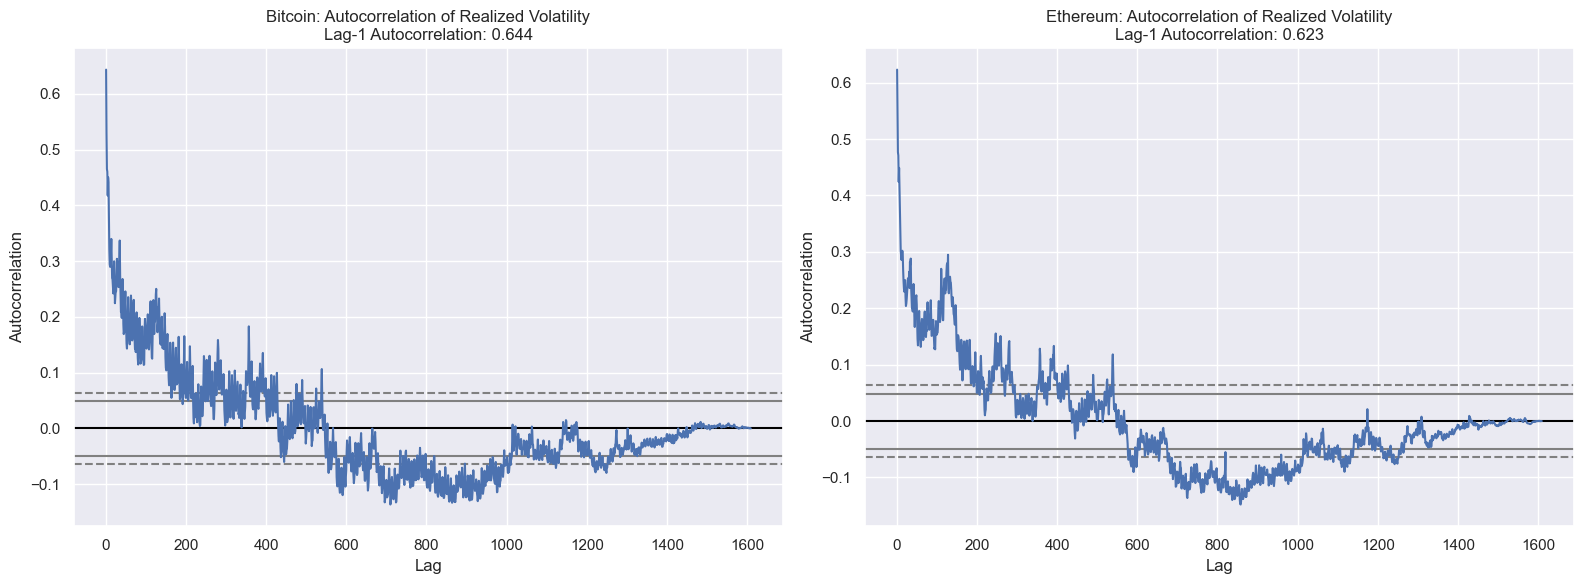

In [13]:
# Calculate autocorrelation of realized volatility
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# BTC autocorrelation
autocorr_btc = pd.Series(rv5_sqrt_aligned['BTCUSDT']).autocorr(lag=1)
pd.plotting.autocorrelation_plot(rv5_sqrt_aligned['BTCUSDT'], ax=axes[0])
axes[0].set_title(f'Bitcoin: Autocorrelation of Realized Volatility\nLag-1 Autocorrelation: {autocorr_btc:.3f}')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('Autocorrelation')
axes[0].grid(True)

# ETH autocorrelation
autocorr_eth = pd.Series(rv5_sqrt_aligned['ETHUSDT']).autocorr(lag=1)
pd.plotting.autocorrelation_plot(rv5_sqrt_aligned['ETHUSDT'], ax=axes[1])
axes[1].set_title(f'Ethereum: Autocorrelation of Realized Volatility\nLag-1 Autocorrelation: {autocorr_eth:.3f}')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('Autocorrelation')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## 4. Predictive Power of Realized Volatility

Let's examine if realized volatility has predictive power for future absolute returns.

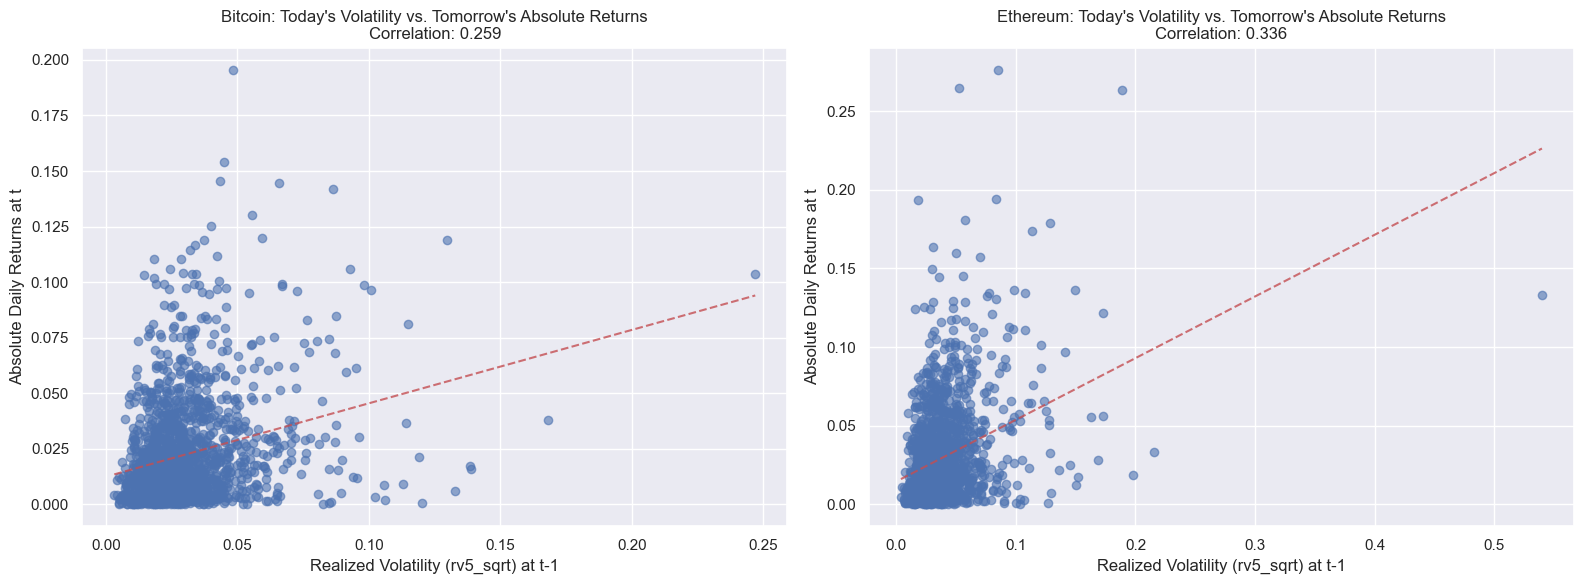

In [14]:
# Shift realized volatility to predict next day's absolute returns
rv5_sqrt_lagged = rv5_sqrt_aligned.shift(1).dropna()
abs_returns_future = abs_returns.loc[rv5_sqrt_lagged.index]

# Create scatter plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# BTC scatter plot
axes[0].scatter(rv5_sqrt_lagged['BTCUSDT'], abs_returns_future['BTCUSDT'], alpha=0.6)
corr_btc = np.corrcoef(rv5_sqrt_lagged['BTCUSDT'], abs_returns_future['BTCUSDT'])[0, 1]
axes[0].set_title(f'Bitcoin: Today\'s Volatility vs. Tomorrow\'s Absolute Returns\nCorrelation: {corr_btc:.3f}')
axes[0].set_xlabel('Realized Volatility (rv5_sqrt) at t-1')
axes[0].set_ylabel('Absolute Daily Returns at t')
# Add regression line
z = np.polyfit(rv5_sqrt_lagged['BTCUSDT'], abs_returns_future['BTCUSDT'], 1)
p = np.poly1d(z)
axes[0].plot(np.sort(rv5_sqrt_lagged['BTCUSDT']), p(np.sort(rv5_sqrt_lagged['BTCUSDT'])), "r--", alpha=0.8)
axes[0].grid(True)

# ETH scatter plot
axes[1].scatter(rv5_sqrt_lagged['ETHUSDT'], abs_returns_future['ETHUSDT'], alpha=0.6)
corr_eth = np.corrcoef(rv5_sqrt_lagged['ETHUSDT'], abs_returns_future['ETHUSDT'])[0, 1]
axes[1].set_title(f'Ethereum: Today\'s Volatility vs. Tomorrow\'s Absolute Returns\nCorrelation: {corr_eth:.3f}')
axes[1].set_xlabel('Realized Volatility (rv5_sqrt) at t-1')
axes[1].set_ylabel('Absolute Daily Returns at t')
# Add regression line
z = np.polyfit(rv5_sqrt_lagged['ETHUSDT'], abs_returns_future['ETHUSDT'], 1)
p = np.poly1d(z)
axes[1].plot(np.sort(rv5_sqrt_lagged['ETHUSDT']), p(np.sort(rv5_sqrt_lagged['ETHUSDT'])), "r--", alpha=0.8)
axes[1].grid(True)

plt.tight_layout()
plt.show()

## 5. Distribution Analysis

Let's examine the distributions of returns and realized volatility.

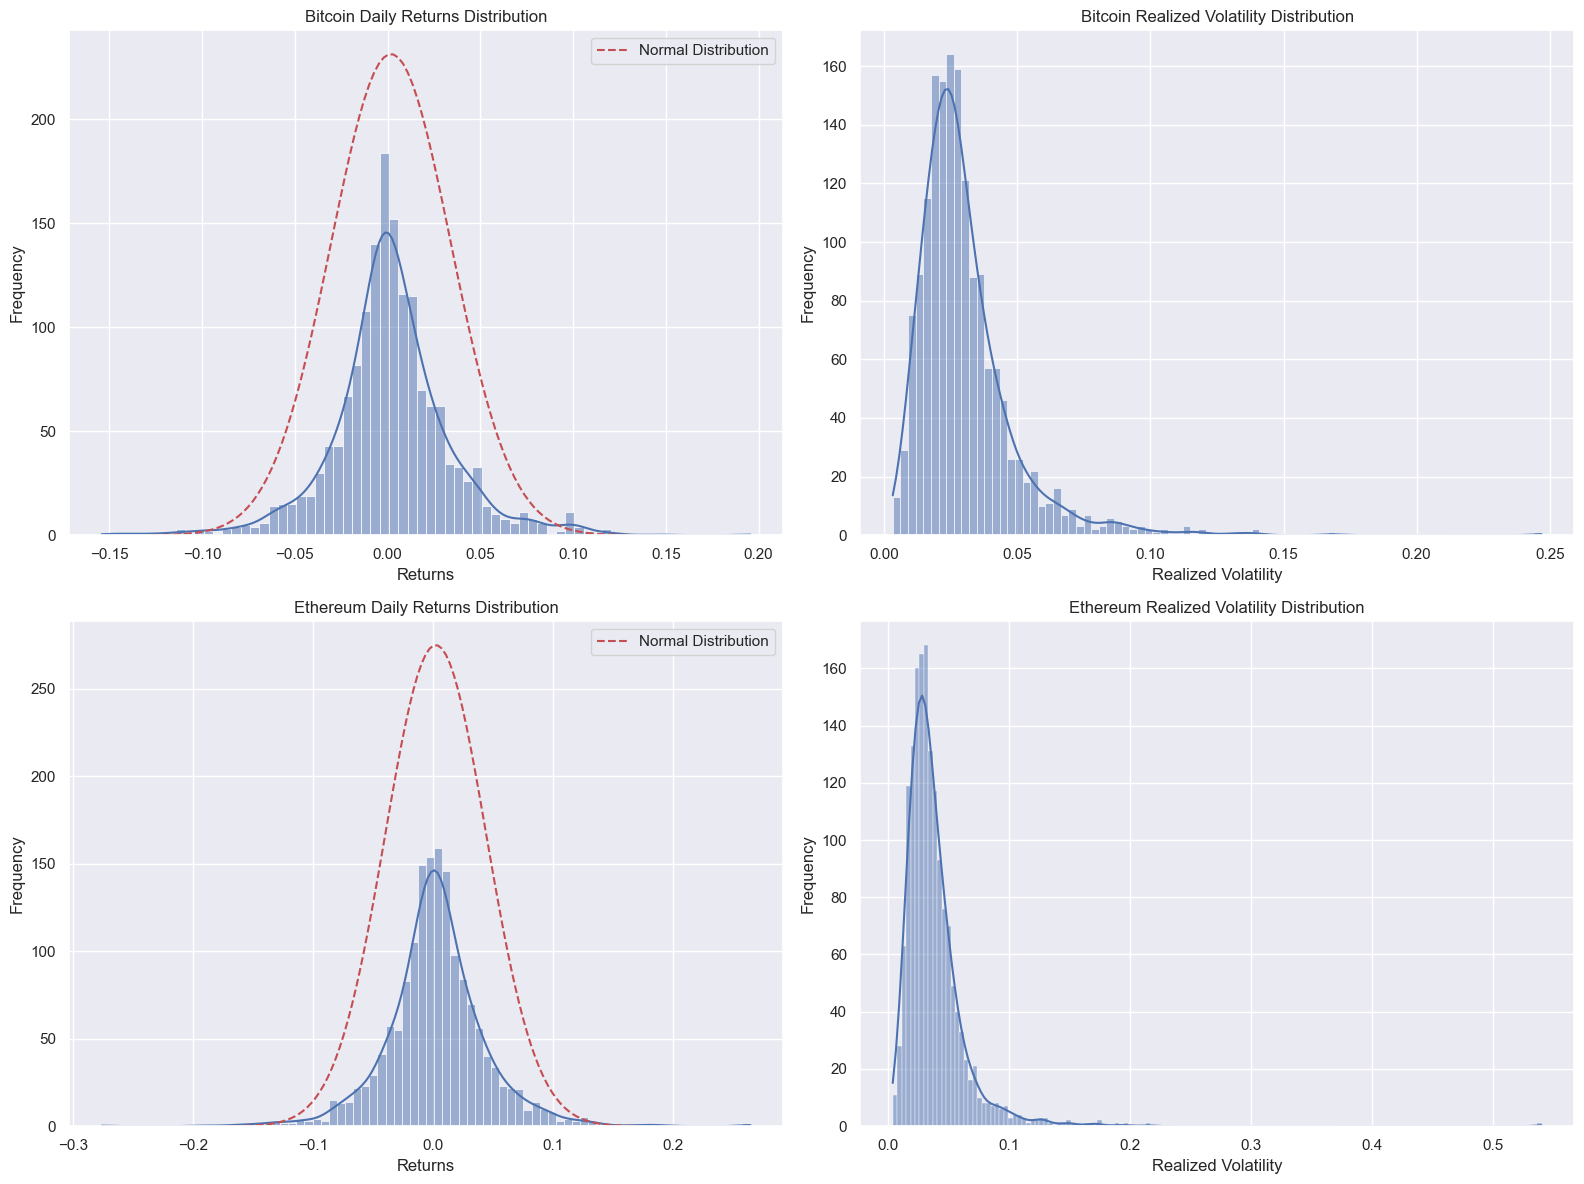

In [15]:
# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# BTC returns distribution
sns.histplot(daily_returns_aligned['BTCUSDT'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Bitcoin Daily Returns Distribution')
axes[0, 0].set_xlabel('Returns')
axes[0, 0].set_ylabel('Frequency')
# Add normal distribution for comparison
mu = daily_returns_aligned['BTCUSDT'].mean()
sigma = daily_returns_aligned['BTCUSDT'].std()
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
axes[0, 0].plot(x, stats.norm.pdf(x, mu, sigma) * len(daily_returns_aligned) * (daily_returns_aligned['BTCUSDT'].max() - daily_returns_aligned['BTCUSDT'].min()) / 30, 'r--', label='Normal Distribution')
axes[0, 0].legend()
axes[0, 0].grid(True)

# BTC realized volatility distribution
sns.histplot(rv5_sqrt_aligned['BTCUSDT'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Bitcoin Realized Volatility Distribution')
axes[0, 1].set_xlabel('Realized Volatility')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True)

# ETH returns distribution
sns.histplot(daily_returns_aligned['ETHUSDT'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Ethereum Daily Returns Distribution')
axes[1, 0].set_xlabel('Returns')
axes[1, 0].set_ylabel('Frequency')
# Add normal distribution for comparison
mu = daily_returns_aligned['ETHUSDT'].mean()
sigma = daily_returns_aligned['ETHUSDT'].std()
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
axes[1, 0].plot(x, stats.norm.pdf(x, mu, sigma) * len(daily_returns_aligned) * (daily_returns_aligned['ETHUSDT'].max() - daily_returns_aligned['ETHUSDT'].min()) / 30, 'r--', label='Normal Distribution')
axes[1, 0].legend()
axes[1, 0].grid(True)

# ETH realized volatility distribution
sns.histplot(rv5_sqrt_aligned['ETHUSDT'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Ethereum Realized Volatility Distribution')
axes[1, 1].set_xlabel('Realized Volatility')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

## 6. Correlation Between BTC and ETH

Let's examine the correlation between Bitcoin and Ethereum in terms of both returns and realized volatility.

Correlation between BTC and ETH returns: 0.8018
Correlation between BTC and ETH realized volatility: 0.9146


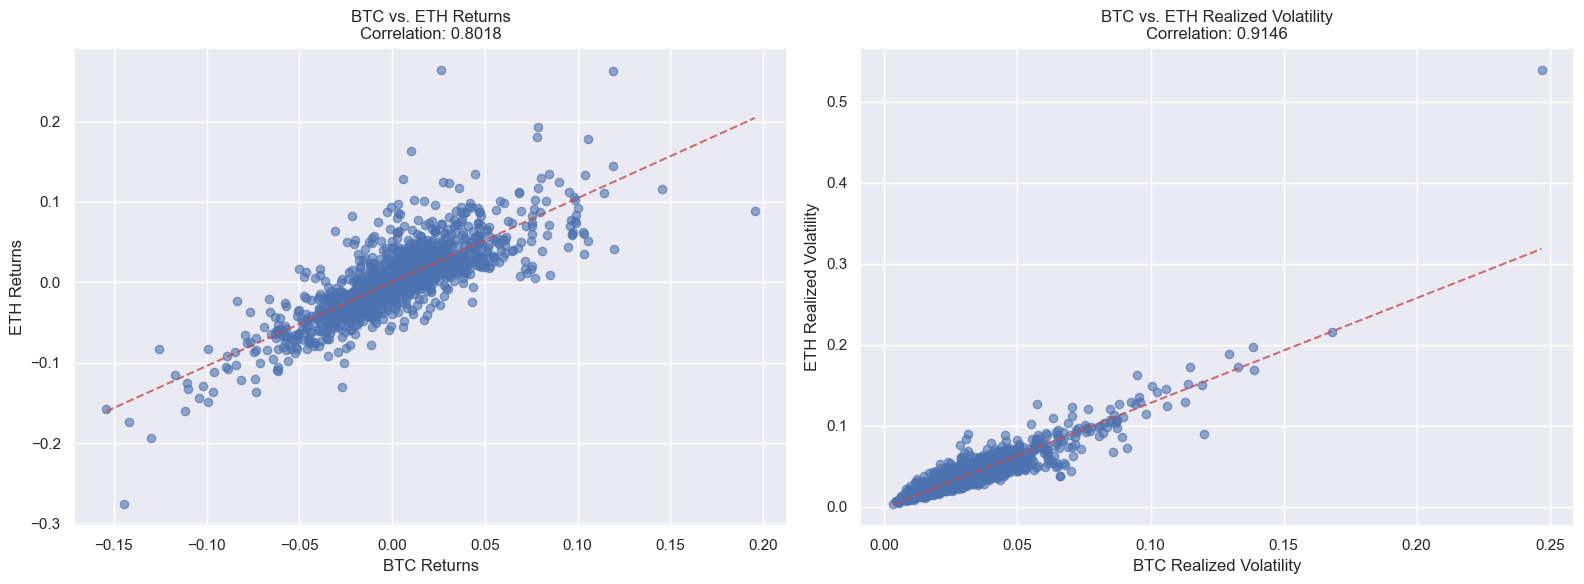

In [16]:
# Calculate correlations
returns_corr = daily_returns_aligned.corr().iloc[0, 1]
rv_corr = rv5_sqrt_aligned.corr().iloc[0, 1]

print(f"Correlation between BTC and ETH returns: {returns_corr:.4f}")
print(f"Correlation between BTC and ETH realized volatility: {rv_corr:.4f}")

# Create scatter plots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Returns correlation
axes[0].scatter(daily_returns_aligned['BTCUSDT'], daily_returns_aligned['ETHUSDT'], alpha=0.6)
axes[0].set_title(f'BTC vs. ETH Returns\nCorrelation: {returns_corr:.4f}')
axes[0].set_xlabel('BTC Returns')
axes[0].set_ylabel('ETH Returns')
# Add regression line
z = np.polyfit(daily_returns_aligned['BTCUSDT'], daily_returns_aligned['ETHUSDT'], 1)
p = np.poly1d(z)
axes[0].plot(np.sort(daily_returns_aligned['BTCUSDT']), p(np.sort(daily_returns_aligned['BTCUSDT'])), "r--", alpha=0.8)
axes[0].grid(True)

# Realized volatility correlation
axes[1].scatter(rv5_sqrt_aligned['BTCUSDT'], rv5_sqrt_aligned['ETHUSDT'], alpha=0.6)
axes[1].set_title(f'BTC vs. ETH Realized Volatility\nCorrelation: {rv_corr:.4f}')
axes[1].set_xlabel('BTC Realized Volatility')
axes[1].set_ylabel('ETH Realized Volatility')
# Add regression line
z = np.polyfit(rv5_sqrt_aligned['BTCUSDT'], rv5_sqrt_aligned['ETHUSDT'], 1)
p = np.poly1d(z)
axes[1].plot(np.sort(rv5_sqrt_aligned['BTCUSDT']), p(np.sort(rv5_sqrt_aligned['BTCUSDT'])), "r--", alpha=0.8)
axes[1].grid(True)

plt.tight_layout()
plt.show()

## 7. Summary Statistics

In [17]:
# Calculate summary statistics for returns
print("Summary Statistics for Daily Returns:")
print(daily_returns_aligned.describe())

print("\nSummary Statistics for Realized Volatility:")
print(rv5_sqrt_aligned.describe())

Summary Statistics for Daily Returns:
symbol      BTCUSDT      ETHUSDT
count   1609.000000  1609.000000
mean       0.001859     0.002224
std        0.032339     0.042111
min       -0.154084    -0.276443
25%       -0.013019    -0.017587
50%        0.000456     0.001538
75%        0.016352     0.022312
max        0.195681     0.264793

Summary Statistics for Realized Volatility:
           BTCUSDT      ETHUSDT
count  1609.000000  1609.000000
mean      0.030098     0.037825
std       0.018341     0.025947
min       0.003181     0.003939
25%       0.018952     0.023579
50%       0.026293     0.032270
75%       0.035798     0.045098
max       0.246937     0.539765


## Summary

In this notebook, we've compared realized volatility (rv5_sqrt) with returns (rtn) for Bitcoin and Ethereum. Key findings include:

1. The relationship between realized volatility and absolute returns
2. Time-series comparison showing how volatility and returns move together over time
3. Evidence of volatility clustering in cryptocurrency markets
4. The predictive power of realized volatility for future returns
5. Non-normal distributions of both returns and realized volatility
6. Correlation patterns between Bitcoin and Ethereum

These insights can be valuable for risk management, trading strategy development, and portfolio optimization in cryptocurrency markets.

### Key Observations from Interactive Visualizations

- **Interactive Time Series**: The Plotly-based visualizations allow for zooming, panning, and hovering to explore specific data points and time periods
- **Dual Y-Axes**: Using separate axes for returns and volatility makes it easier to compare metrics with different scales
- **Scatter Plot Analysis**: The interactive scatter plots reveal the correlation between realized volatility and returns/absolute returns
- **Detail on Demand**: Hover tooltips provide precise values without cluttering the visualization

### Key Observations from Overlapping Plots

- Realized volatility tends to spike during periods of market stress, coinciding with large price movements
- There is a positive correlation between realized volatility and absolute returns
- Bitcoin and Ethereum show similar patterns in both returns and volatility, indicating market-wide factors affect both cryptocurrencies
- The normalized plots reveal that volatility tends to be more persistent than returns, showing clustering behavior
- Absolute returns track realized volatility more closely than raw returns, confirming that volatility measures the magnitude rather than the direction of price changes